# K-Nearest Neighbors and Naive Bayes
An implementation of the K-Nearest Neighbors and Naive Bayes algorithm for the digit recognition dataset. 

In [2]:
import pandas as pd
import numpy as np
import os
%matplotlib inline

/home/sibi/acad/prog_tools/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## 1. Import Training Set
Load each file and convert into a numpy vector (add it to a pandas dataframe).

There will be 1024 features (since the size is 32x32) for each digit followed by the digit label. The digit's label can be included from the file name.

In [3]:
"""Function to convert image to a vector"""
def img2vector(filename):
    returnVect = np.zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
        
    return returnVect

### 1.a. Convert all files to a vector and create a dataframe

Convert the training and testing data to numpy arrays and create a dataframe.

In [4]:
"""Training data"""
path = '/home/sibi/acad/mach_learn_with_networks/assignment1/digits/trainingDigits/'
files = os.listdir(path)
df_train = pd.DataFrame(columns = range(1024))
i=0
y = np.array([])
for file in files:
    df_train.loc[i]=np.transpose(img2vector(path+file)[0])
    y = np.append(y,int(file[0]))
    i+=1
df_train[1024] = y
df_train = df_train.astype(int)


In [5]:
"""Test data"""
path = '/home/sibi/acad/mach_learn_with_networks/assignment1/digits/testDigits/'
files = os.listdir(path)
df_test = pd.DataFrame(columns = range(1024))
i=0
y = np.array([])
for file in files:
    df_test.loc[i]=np.transpose(img2vector(path+file)[0])
    y = np.append(y,int(file[0]))
    i+=1
df_test[1024] = y
df_test = df_test.astype(int)


### 1.b. Show one sample from each as a binary image

Pick one random binary text file and convert it to a binary image. Store the file.

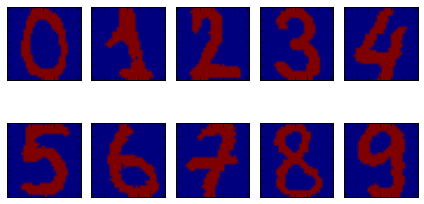

In [6]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
fig = plt.figure()
num = 0
for i in range(2):
    for j in range(5):
        ax = plt.subplot2grid((2,5), (i,j))
        data = img2vector("/home/sibi/acad/mach_learn_with_networks/assignment1/digits/trainingDigits/" + str(num) +"_50.txt")
        data = data.reshape(32,32)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.imshow(data)
        num +=1 
fig.tight_layout()
plt.show()


## 2. K-Nearest Neighbor Classifier
We train a knn classifier on the training set that we imported in the previous step. We then find its trianing error on a range of k-values from 1 to 10. We then also use it on the testing set to make predictions and check the performance.

### 2.a. Prepare data for KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [8]:
X_train = df_train.loc[:,0:1023]
y_train = df_train.loc[:,1024]
X_test = df_test.loc[:,0:1023]
y_test = df_test.loc[:,1024]
#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#print(y_test.shape)
#print(type(y_train[0]))


### 2.b. knn on the training data set

In [9]:
%%time
train_accuracies = []
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_train)
    acc = metrics.accuracy_score(y_train, y_pred)
    print acc
    train_accuracies.append(acc)
KNN_train_accuracy = np.mean(train_accuracies)
print("--------------------------")
print("Mean accuracy : {}".format(KNN_train_accuracy))
print("--------------------------")
print("Running time for this code")

1.0
0.987073422958
0.986556359876
0.981385729059
0.981902792141
0.980351602896
0.977766287487
0.974146845915
0.976215098242
0.97569803516
--------------------------
Mean accuracy : 0.982109617373
--------------------------
Running time for this code
CPU times: user 1min 22s, sys: 7.07 ms, total: 1min 22s
Wall time: 1min 22s


In [10]:
#print("Mean accuracy : {}".format(np.mean(train_accuracies)))

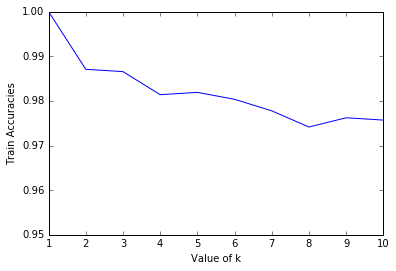

In [14]:
plt.plot(range(1,11),train_accuracies)
plt.ylim(0.95,1)
plt.ylabel("Train Accuracies")
plt.xlabel("Value of k")
plt.show()

### 2.b. knn on the testing data set

In [12]:
%%time
test_accuracies = []
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print acc
    test_accuracies.append(acc)
KNN_test_accuracy = np.mean(test_accuracies)
print("--------------------------")
print("Mean accuracy : {}".format(KNN_test_accuracy))
print("--------------------------")
print("Running time for this code")

0.987315010571
0.976744186047
0.987315010571
0.983086680761
0.980972515856
0.976744186047
0.975687103594
0.975687103594
0.974630021142
0.975687103594
--------------------------
Mean accuracy : 0.979386892178
--------------------------
Running time for this code
CPU times: user 40 s, sys: 4.08 ms, total: 40 s
Wall time: 39.9 s


In [13]:
#print("Mean accuracy : {}".format(np.mean(test_accuracies)))

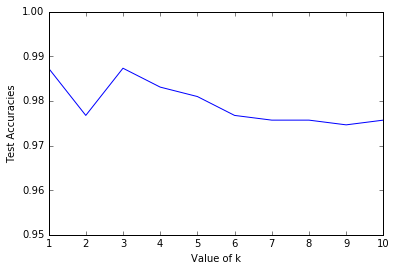

0.97938689217758979

In [16]:
plt.plot(range(1,11),test_accuracies)
plt.ylim(0.95,1)
plt.ylabel("Test Accuracies")
plt.xlabel("Value of k")
plt.show()
np.mean(test_accuracies)

For the training error, k=1 will obviously give 100% accuracy because any point will find itself in the training data set and calculate the euclidean distance to be 0. And for cases when k is even, scikitlearn takes a random vote internally to decide the class. We can see that the accuracy is gradually decreasing as we increase the value of k.

In the testing set, we get the best performance for k=1 and k=3 while other accuracies are lower than these. 

A value of k=3 works best for this data set.

## 3. Naive Bayes Classifier

We use the training data set to learn the conditional probabilities and subsequently use it in predictions.

In [17]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [18]:
%%time
"""Training"""
NB.fit(X_train,y_train)
y_pred = NB.predict(X_train)
#print("Number of mislabeled points out of a total %d points : %d"% (X_train.shape[0],(y_test != y_pred).sum()))
NB_train_accuracy = metrics.accuracy_score(y_train, y_pred)
print("Training accuracy : {}".format(NB_train_accuracy))

Training accuracy : 0.791623578077
CPU times: user 221 ms, sys: 32 ms, total: 253 ms
Wall time: 252 ms


In [19]:
%%time
"""Testing"""
NB.fit(X_train,y_train)
y_pred = NB.predict(X_test)
#print("Number of mislabeled points out of a total %d points : %d"% (X_train.shape[0],(y_test != y_pred).sum()))
NB_test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Testing accuracy : {}".format(NB_test_accuracy))

Testing accuracy : 0.733615221987
CPU times: user 127 ms, sys: 0 ns, total: 127 ms
Wall time: 127 ms


### Ways to improve the performance of Naive Bayes Classifier

1. By doing PCA - Reduction in the number of dimensions greatly improves the efficiency of NB.
2. Removing redundant information - Similar to PCA. Naive Bayes Classifier does not really need that much data to model the concept. It needs just enough data to understand the probabilistic relationship of each feature.
3. Feature Selection - Using probabilities of each feature from the training data set, we can potentially perform feature selection.

### Principal Component Analysis 

We apply PCA on the original data (both training and testing set). We then perform both KNN and NB training and evaluation to estimate how much of a difference PCA makes.

### Project onto a lower dimensional subspace
A quesiton that arises when using PCA is how many components should we choose? We use the inbuilt function in scikitlearn "explained\_variance\_ratio\_".This lets us look at how much variance is covered by each principal component. For simplicity sake, I have taken number of components to be 200 and it explains nearly 90% of the variance of data. This seems like a reasonable assumption to make.

Note : Keep number of components, n\_components=50 also gives a reasonably good performance of around 90%. 

[ 10.14  19.81  27.95  33.7   37.93  41.76  45.03  47.81  50.3   52.55
  54.53  56.21  57.68  59.02  60.25  61.41  62.47  63.5   64.41  65.29
  66.07  66.85  67.56  68.24  68.83  69.38  69.89  70.37  70.83  71.28
  71.71  72.11  72.5   72.88  73.23  73.56  73.88  74.19  74.49  74.77
  75.05  75.32  75.58  75.83  76.07  76.3   76.53  76.74  76.95  77.15
  77.35  77.54  77.73  77.92  78.1   78.27  78.44  78.61  78.78  78.94
  79.1   79.26  79.42  79.57  79.72  79.87  80.02  80.17  80.31  80.45
  80.59  80.73  80.86  80.99  81.12  81.25  81.38  81.5   81.62  81.74
  81.86  81.98  82.1   82.21  82.32  82.43  82.54  82.65  82.76  82.87
  82.98  83.08  83.18  83.28  83.38  83.48  83.58  83.68  83.78  83.88
  83.97  84.06  84.15  84.24  84.33  84.42  84.51  84.6   84.69  84.78
  84.87  84.96  85.04  85.12  85.2   85.28  85.36  85.44  85.52  85.6
  85.68  85.76  85.84  85.92  86.    86.08  86.16  86.24  86.32  86.39
  86.46  86.53  86.6   86.67  86.74  86.81  86.88  86.95  87.02  87.09
  87.16

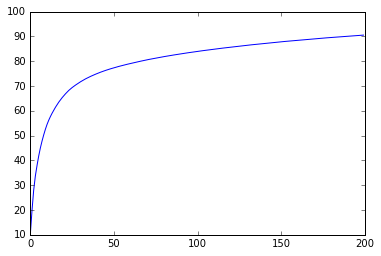

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
pca.fit(X_train)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)

In [45]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

### KNN on the transformed data

In [46]:
%%time
train_accuracies_pca = []
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_pca,y_train)
    y_pred = knn.predict(X_train_pca)
    acc = metrics.accuracy_score(y_train, y_pred)
    print acc
    train_accuracies_pca.append(acc)
KNN_pca_train_accuracy = np.mean(train_accuracies_pca)
print("--------------------------")
print("Mean accuracy : {}".format(KNN_pca_train_accuracy))
print("--------------------------")
print("Running time for this code")


1.0
0.988107549121
0.986556359876
0.984488107549
0.984488107549
0.979317476732
0.97880041365
0.976732161324
0.978283350569
0.976732161324
--------------------------
Mean accuracy : 0.983350568769
--------------------------
Running time for this code
CPU times: user 12.8 s, sys: 4.04 ms, total: 12.8 s
Wall time: 12.8 s


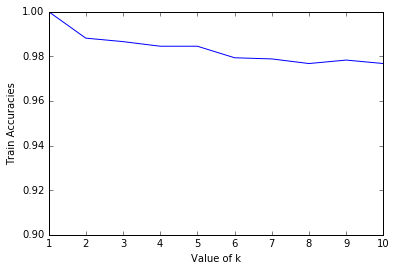

In [47]:
plt.plot(range(1,11),train_accuracies_pca)
plt.ylim(0.90,1)
plt.ylabel("Train Accuracies")
plt.xlabel("Value of k")
plt.show()

In [48]:
%%time
test_accuracies_pca = []
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_pca,y_train)
    y_pred = knn.predict(X_test_pca)
    acc = metrics.accuracy_score(y_test, y_pred)
    print acc
    test_accuracies_pca.append(acc)
KNN_pca_test_accuracy = np.mean(test_accuracies_pca)
print("--------------------------")
print("Mean accuracy : {}".format(KNN_pca_test_accuracy))
print("--------------------------")
print("Running time for this code")


0.986257928118
0.978858350951
0.989429175476
0.982029598309
0.982029598309
0.978858350951
0.975687103594
0.976744186047
0.973572938689
0.975687103594
--------------------------
Mean accuracy : 0.979915433404
--------------------------
Running time for this code
CPU times: user 6.68 s, sys: 1 µs, total: 6.68 s
Wall time: 6.66 s


In [49]:
#print np.mean(test_accuracies_pca)

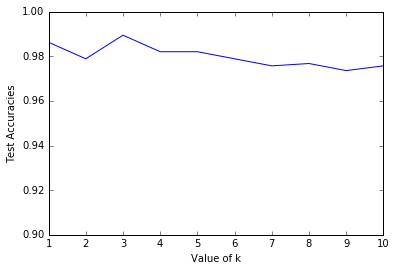

In [50]:
plt.plot(range(1,11),test_accuracies_pca)
plt.ylim(0.90,1)
plt.ylabel("Test Accuracies")
plt.xlabel("Value of k")
plt.show()

------------------------------------------------------------

### Naive Bayes on the transformed data 

#### Training data

In [51]:
%%time
NB.fit(X_train_pca,y_train)
y_pred = NB.predict(X_train_pca)
#print("Number of mislabeled points out of a total %d points : %d"% (X_train.shape[0],(y_test != y_pred).sum()))
NB_pca_train_accuracy = metrics.accuracy_score(y_train, y_pred)
print("Accuracy : {}".format(NB_pca_train_accuracy))
print("--------------------------")
print("Running time for this code")


Accuracy : 0.9632885212
--------------------------
Running time for this code
CPU times: user 39.7 ms, sys: 0 ns, total: 39.7 ms
Wall time: 38.9 ms


#### Test data

In [52]:
%%time
NB.fit(X_train_pca,y_train)
y_pred = NB.predict(X_test_pca)
#print("Number of mislabeled points out of a total %d points : %d"% (X_train.shape[0],(y_test != y_pred).sum()))
NB_pca_test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy : {}".format(NB_pca_test_accuracy))
print("--------------------------")
print("Running time for this code")


Accuracy : 0.948202959831
--------------------------
Running time for this code
CPU times: user 17.6 ms, sys: 3.9 ms, total: 21.5 ms
Wall time: 21.1 ms


## 5. Conclusion

We try and compare the performance of the two classifiers before and after applying PCA based on both their accuracies as well as their running times.

### 5.a. KNN and PCA (accuracies)
As can be seen from the plot, there isn't much difference in the accuracies even after PCA has been applied. There is only a marginal increase in the mean training and testing accuracies for k ranging from 1 to 10.

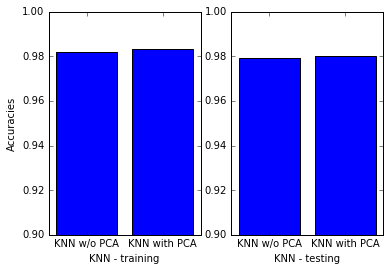

In [53]:
fig = plt.figure()
#training
plt.tight_layout

ax1 = fig.add_subplot(1,2,1)
plt.bar([1,2],[KNN_train_accuracy, KNN_pca_train_accuracy], align = "center")
plt.ylim(0.90,1)
plt.ylabel("Accuracies")
plt.xlabel("KNN - training")
plt.xticks(range(1,3),[ "KNN w/o PCA", "KNN with PCA"])
#plt.show()

ax1 = fig.add_subplot(1,2,2)
plt.bar([1,2],[KNN_test_accuracy, KNN_pca_test_accuracy], align = "center")
plt.ylim(0.90,1)
#plt.ylabel("Testing Accuracies")
plt.xlabel("KNN - testing")
plt.xticks(range(1,3),[ "KNN w/o PCA", "KNN with PCA"])
plt.show()



### 5.b. KNN and PCA (time taken)
Even though not much change in accuracy was noticed, we could (as expected) notice a huge difference in the training and testing times for KNN. This is essentially because we are reducing the amount of training (comparisons to find euclidean distance) to be done in the reduced subspace. 


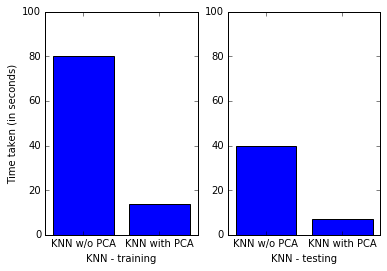

In [54]:
fig = plt.figure()
#training
plt.tight_layout

ax1 = fig.add_subplot(1,2,1)
plt.bar([1,2],[80, 14], align = "center")
plt.ylim(0,100)
plt.ylabel("Time taken (in seconds)")
plt.xlabel("KNN - training")
plt.xticks(range(1,3),[ "KNN w/o PCA", "KNN with PCA"])
#plt.show()

ax1 = fig.add_subplot(1,2,2)
plt.bar([1,2],[40, 7], align = "center")
plt.ylim(0,100)
#plt.ylabel("Testing Accuracies")
plt.xlabel("KNN - testing")
plt.xticks(range(1,3),[ "KNN w/o PCA", "KNN with PCA"])
plt.show()



### 5.c. NB and PCA (accuracies)

Unlike KNN, we could easily observe a considerable amount of increase in the accuracies of Naive Bayes classifier after applying PCA on the data. There was approximately over 20% increase in the testing accuracy. This is expected because we are removing a lot of dimensions by doing PCA. 

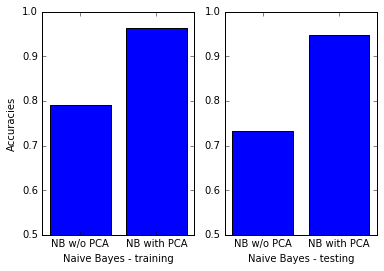

In [55]:
fig = plt.figure()
#training
plt.tight_layout

ax1 = fig.add_subplot(1,2,1)
plt.bar([1,2],[NB_train_accuracy, NB_pca_train_accuracy], align = "center")
plt.ylim(0.5,1)
plt.ylabel("Accuracies")
plt.xlabel("Naive Bayes - training")
plt.xticks(range(1,3),[ "NB w/o PCA", "NB with PCA"])
#plt.show()

ax1 = fig.add_subplot(1,2,2)
plt.bar([1,2],[NB_test_accuracy, NB_pca_test_accuracy], align = "center")
plt.ylim(0.5,1)
#plt.ylabel("Testing Accuracies")
plt.xlabel("Naive Bayes - testing")
plt.xticks(range(1,3),[ "NB w/o PCA", "NB with PCA"])
plt.show()



In conclusion, we can say that even for an application such as digit recognition with simple binary images of small size (32x32), there are 1024 feature and we are dealing with a feature space that has 1024 dimensions. Even by manual observing a few of the binary images, we can guess that there are several positions in the image which are highly correlated. PCA helps us in reducing the number of dimensions thereby helping increase the accuracy of the Naive Bayes classifier and reduce the runtime of both classifiers. 